In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


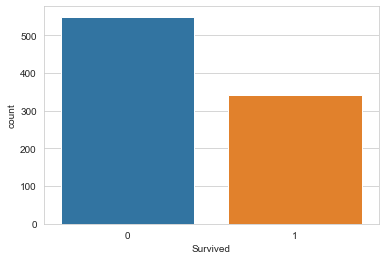

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

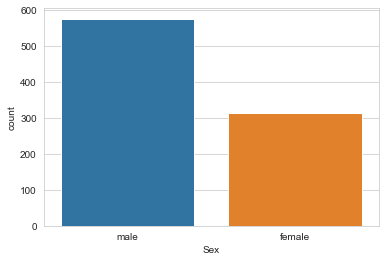

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

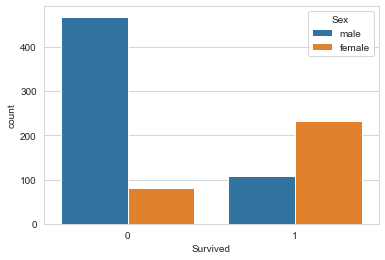

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

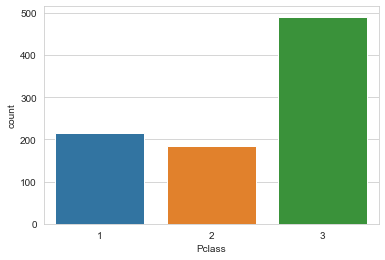

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=df)

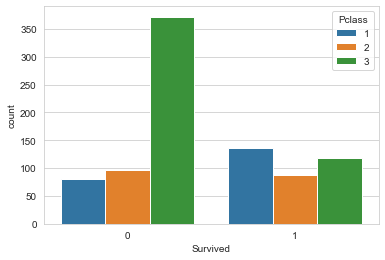

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

In [11]:
print(df['Embarked'].nunique())
print(df['Embarked'].unique())

3
['S' 'C' 'Q' nan]


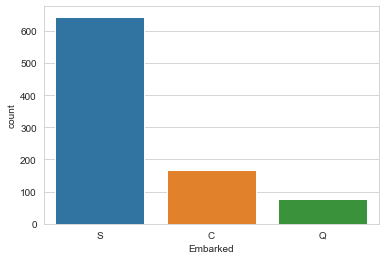

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=df)

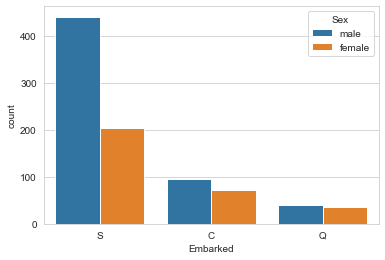

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Sex',data=df)

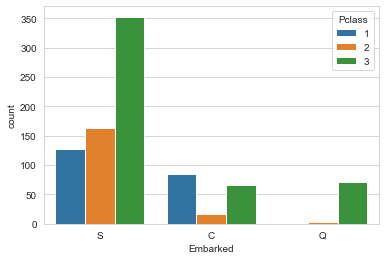

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Pclass',data=df)

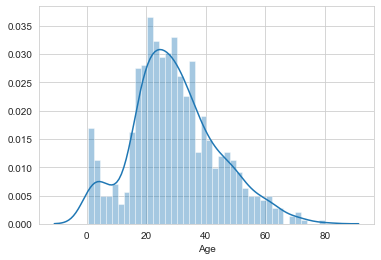

In [15]:
sns.distplot(df['Age'].dropna(),bins=40)

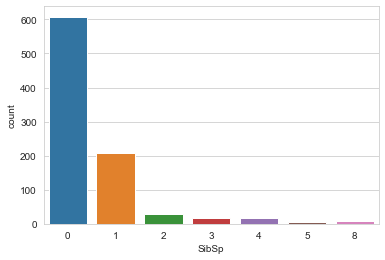

In [16]:
sns.countplot(x='SibSp',data=df)

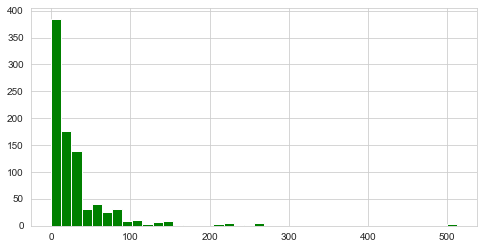

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

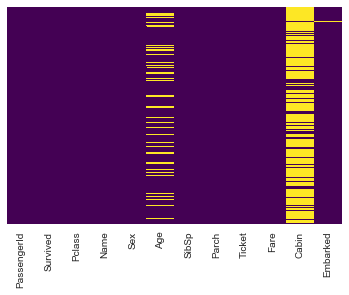

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
p1class=df[df['Pclass']==1]
p1=round(p1class['Age'].mean(),2)
p2class=df[df['Pclass']==2]
p2=round(p2class['Age'].mean(),2)
p3class=df[df['Pclass']==3]
p3=round(p3class['Age'].mean(),2)
print(p1,p2,p3)

38.23 29.88 25.14


In [20]:
def replace_age_na(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return p1
        elif Pclass == 2:
            return p2
        else:
            return p3
    else:
        return Age

In [21]:
df['Age'] = df[['Age','Pclass']].apply(replace_age_na,axis=1)

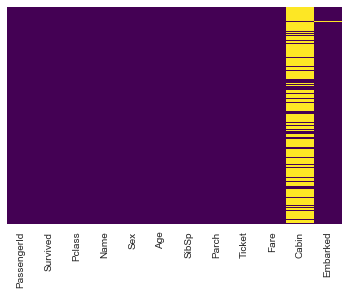

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

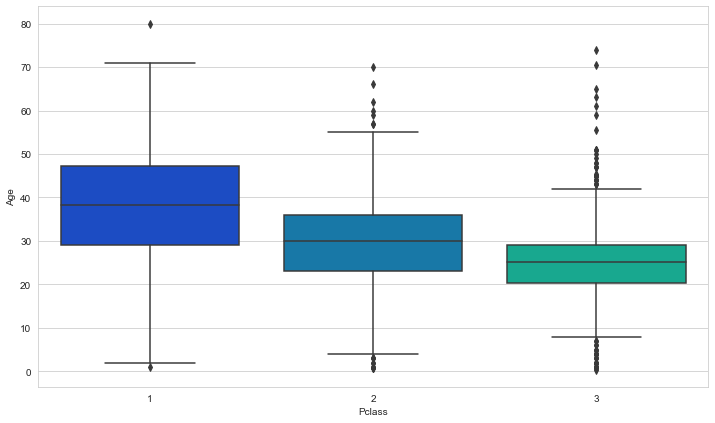

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

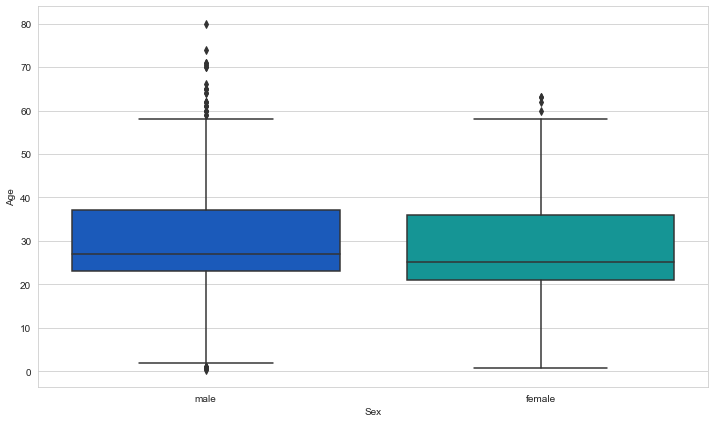

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=df,palette='winter')

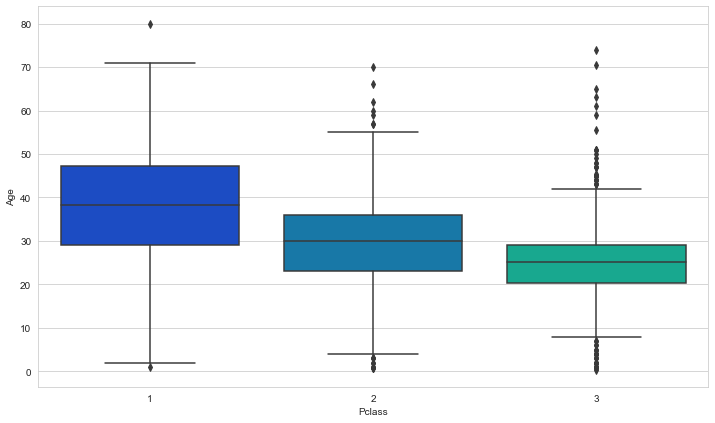

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [26]:
#upper_lim=df['Age'].mean()+df['Age'].std ()*1
#lower_lim=df['Age'].mean()-df['Age'].std()*1
#data = df[(df['Age'] > upper_lim) | (df['Age'] < lower_lim)]
#nnum=list(data.index)
#df.drop(nnum,inplace=True)
#plt.figure(figsize=(12, 7))
#sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [27]:
upper_lim=df['Age'].quantile(.95)
lower_lim=df['Age'].quantile(.05)
df=df[(df['Age'] < upper_lim) & (df['Age'] > lower_lim)]

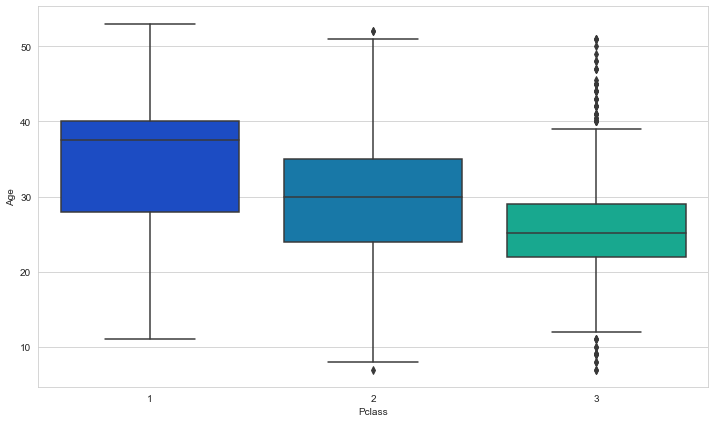

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [29]:
print(upper_lim,lower_lim)

54.0 6.0


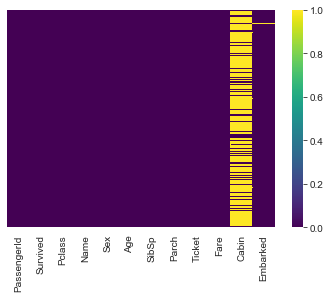

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [31]:
df.drop('Cabin',axis=1,inplace=True)

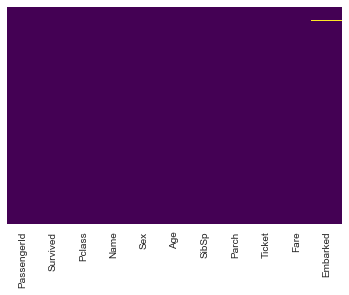

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df[df['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN


In [34]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

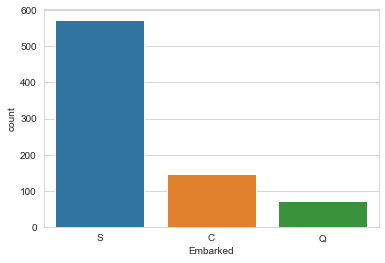

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=df)

In [36]:
from statistics import mode
df["Embarked"]= df["Embarked"].fillna(mode(df["Embarked"]))

In [37]:
df[df['Embarked']=='S'].count()
df[df['Embarked']=='C'].count()
df[df['Embarked']=='Q'].count()
df['Embarked'].fillna('S',inplace=True)

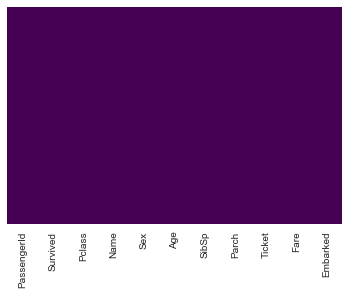

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
sex = pd.get_dummies(df['Sex'])
embark = pd.get_dummies(df['Embarked'])

In [40]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
df= pd.concat([df,sex,embark],axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'], test_size=0.30, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression(max_iter=120000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
predictions

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[135,  21],
       [ 19,  64]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8326359832635983

In [50]:
predictions

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       156
           1       0.75      0.77      0.76        83

    accuracy                           0.83       239
   macro avg       0.81      0.82      0.82       239
weighted avg       0.83      0.83      0.83       239

